In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# The Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

trainset = datasets.MNIST('data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('data/', download=True, train=False, transform=transform)


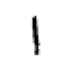

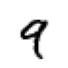

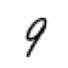

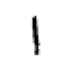

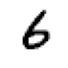

In [3]:
import matplotlib.pyplot as plt

for i in [8,4,22,8,66]:
    image, label = trainset[i]
    plt.figure(figsize=(1,1))
    plt.imshow(image.numpy().squeeze(), cmap='gray_r');
    plt.axis('off')
#     plt.savefig('../mnist_pics/pic{}.png'.format(i), transparent=True)
    plt.show()
    plt.close()

# The Model

In [6]:
def sigma(x):
    return x.clamp(min=0)

def random_param(shape):
    std = 1/np.sqrt(shape[-1])
    param = torch.normal(0., std, shape)
    param.requires_grad=True
    return param

class NN():
    def __init__(self, dims=[784, 128, 64, 10]):
        
        self.A, self.B = [],[]
        for l in range(len(dims) -1 ):
            self.A += [random_param((dims[l],dims[l+1]))]
            self.B += [random_param((dims[l+1],)) ]
        
        self.theta = self.A + self.B
        
    def forward(self, x):
        for a,b in zip(self.A, self.B):
            x = sigma(x.matmul(a) + b)
        return x


# The Training

In [8]:
model = NN()

lr = 0.002

epochs = 5

criterion = nn.CrossEntropyLoss()
time0 = time()

for e in range(epochs):
    running_loss = 0
    for image, label in trainset:
        # Flatten MNIST images into a 784 long vector
        output = model.forward(image.flatten())
        loss = criterion(output.unsqueeze(0), torch.tensor([label]))
        
        loss.backward()
        
        #And optimizes the weights 
        for param in model.theta:
            with torch.no_grad(): 
                param -= lr*param.grad
            param.grad.zero_()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainset)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.7168804148023606
Epoch 1 - Training loss: 0.4226807407373896
Epoch 2 - Training loss: 0.30355091258861006
Epoch 3 - Training loss: 0.2808127522820016
Epoch 4 - Training loss: 0.2684693714748516

Training Time (in minutes) = 3.223597999413808


# The Results

In [10]:
test = 'training' # 'training'

if test == 'validation':
    testset = valset
else:
    testset == trainset
compare = []
for image, label in testset:
    prediction = model.forward(image.flatten()).argmax()
    compare.append(prediction == label)

acc = float(sum(compare)/len(compare))
print('The accuracy on {} the set is {}%'.format(test,100*round(acc,4)))


The accuracy on training the set is 87.16000000000001%


In [ ]:
for i in range(300):
    image, label = trainset[i]
    prediction = model.forward(image.flatten()).argmax()
    if prediction != label:
        plt.figure(figsize=(1,1))
        plt.imshow(image.numpy().squeeze(), cmap='gray_r');
        plt.axis('off')
        plt.title("Model predicted {}, \n the true label is {}".format(prediction, label))
        plt.show()
        plt.close()